<a href="https://colab.research.google.com/github/Berk3459/Supply-chain-Analysis/blob/main/dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_shopping_data.csv (1).zip")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


In [ ]:
df['category'].value_counts()

,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


In [ ]:
df.groupby(["category",df.index])["quantity"].sum()

category       
Books     4        4
          11       1
          16       2
          24       5
          45       5
                  ..
Toys      99433    1
          99438    5
          99444    1
          99447    3
          99451    5
Name: quantity, Length: 99457, dtype: int64

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'],dayfirst=True)

In [ ]:
df.set_index(df['invoice_date'],inplace=True)

In [ ]:
df.sort_index(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 99457 entries, 2021-01-01 to 2023-03-08
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 8.3+ MB


In [ ]:
df.shape

(99457, 10)

In [ ]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
invoice_date,,,,,,,,,,
2021-01-01,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
2021-01-01,I313757,C438201,Female,43,Clothing,4,1200.32,Credit Card,2021-01-01,Mall of Istanbul
2021-01-01,I836951,C382440,Male,54,Clothing,3,900.24,Cash,2021-01-01,Metrocity
2021-01-01,I159235,C312481,Male,58,Food & Beverage,4,20.92,Credit Card,2021-01-01,Mall of Istanbul
2021-01-01,I115941,C105769,Male,34,Clothing,1,300.08,Cash,2021-01-01,Istinye Park


In [ ]:
df.index.min()

Timestamp('2021-01-01 00:00:00')

In [ ]:
df.index.max()

Timestamp('2023-03-08 00:00:00')

<Axes: xlabel='invoice_date', ylabel='quantity'>

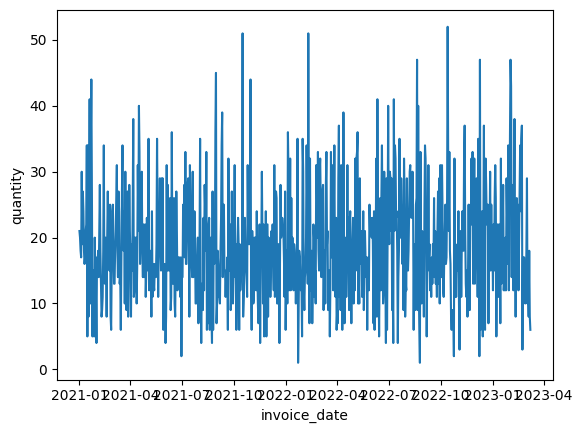

In [ ]:
book = df[df["category"] == "Books"]
TotalSales = book.groupby(book.index)["quantity"].sum()
sns.lineplot(TotalSales)



In [ ]:
Total_sales = df.groupby(df.index)["quantity"].sum()
ts = Total_sales.to_frame()
ts.head()


,quantity
invoice_date,
2021-01-01,333
2021-01-02,387
2021-01-03,405
2021-01-04,379
2021-01-05,374


In [ ]:
train = ts.loc["2021-01-01":"2023-02-08"]

In [ ]:
test = ts.loc["2023-02-07":]

In [ ]:
test

,quantity
invoice_date,
2023-02-07,364
2023-02-08,415
2023-02-09,400
2023-02-10,369
2023-02-11,340
2023-02-12,384
2023-02-13,432
2023-02-14,417
2023-02-15,383


In [ ]:
import plotly.graph_objs as go

In [ ]:
daily_sales_sc = go.Scatter(x=train.index, y=train['quantity'])
layout = go.Layout(title='Daily sales', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)
fig.show()

In [ ]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
window = 29
lag = 1
series = series_to_supervised(train, window=window, lag=lag)
series.head()

,quantity(t-29),quantity(t-28),quantity(t-27),quantity(t-26),quantity(t-25),quantity(t-24),quantity(t-23),quantity(t-22),quantity(t-21),quantity(t-20),...,quantity(t-8),quantity(t-7),quantity(t-6),quantity(t-5),quantity(t-4),quantity(t-3),quantity(t-2),quantity(t-1),quantity(t),quantity(t+1)
invoice_date,,,,,,,,,,,,,,,,,,,,,
2021-01-30,333.0,387.0,405.0,379.0,374.0,459.0,402.0,337.0,322.0,351.0,...,408.0,373.0,347.0,379.0,348.0,363.0,389.0,330.0,363,321.0
2021-01-31,387.0,405.0,379.0,374.0,459.0,402.0,337.0,322.0,351.0,344.0,...,373.0,347.0,379.0,348.0,363.0,389.0,330.0,363.0,321,330.0
2021-02-01,405.0,379.0,374.0,459.0,402.0,337.0,322.0,351.0,344.0,378.0,...,347.0,379.0,348.0,363.0,389.0,330.0,363.0,321.0,330,329.0
2021-02-02,379.0,374.0,459.0,402.0,337.0,322.0,351.0,344.0,378.0,369.0,...,379.0,348.0,363.0,389.0,330.0,363.0,321.0,330.0,329,353.0
2021-02-03,374.0,459.0,402.0,337.0,322.0,351.0,344.0,378.0,369.0,378.0,...,348.0,363.0,389.0,330.0,363.0,321.0,330.0,329.0,353,389.0


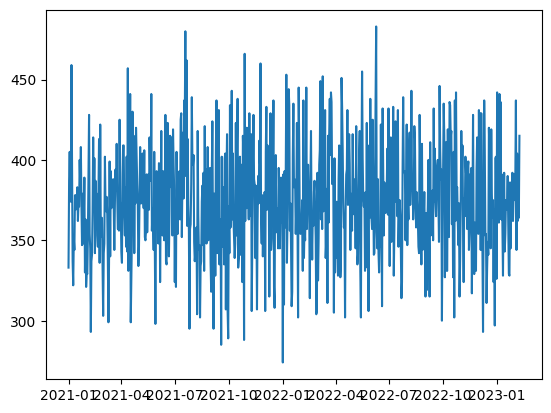

In [ ]:
plt.plot(train)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,month_plot

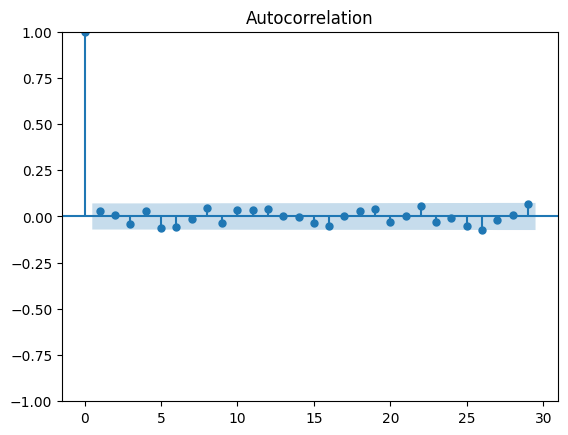

In [ ]:
acf = plot_acf(train)
plt.show(acf)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adf = adfuller(train)
adf[1]

0.0

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
model = auto_arima(train,trace=True,seasonal=True,m = 26)
model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[26] intercept   : AIC=7669.474, Time=3.74 sec
 ARIMA(0,0,0)(0,0,0)[26] intercept   : AIC=7662.028, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[26] intercept   : AIC=7663.523, Time=5.81 sec
 ARIMA(0,0,1)(0,0,1)[26] intercept   : AIC=7661.630, Time=1.48 sec
 ARIMA(0,0,0)(0,0,0)[26]             : AIC=11304.697, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[26] intercept   : AIC=7663.411, Time=0.18 sec
 ARIMA(0,0,1)(1,0,1)[26] intercept   : AIC=7663.629, Time=2.49 sec
 ARIMA(0,0,1)(0,0,2)[26] intercept   : AIC=7663.630, Time=7.52 sec
 ARIMA(0,0,1)(1,0,0)[26] intercept   : AIC=7665.378, Time=4.15 sec
 ARIMA(0,0,1)(1,0,2)[26] intercept   : AIC=inf, Time=28.49 sec
 ARIMA(0,0,0)(0,0,1)[26] intercept   : AIC=7660.057, Time=1.14 sec
 ARIMA(0,0,0)(1,0,1)[26] intercept   : AIC=7662.068, Time=1.27 sec
 ARIMA(0,0,0)(0,0,2)[26] intercept   : AIC=7662.057, Time=6.79 sec
 ARIMA(0,0,0)(1,0,0)[26] intercept   : AIC=7663.984, Time=1.55 sec
 ARIMA(0,0,0)(1,0,2)[2

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 26),
      suppress_warnings=True)

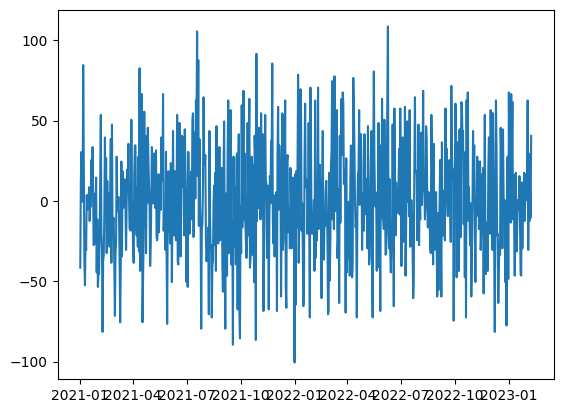

In [ ]:
plt.plot(model.resid())

In [ ]:
import statsmodels.api as sm

In [ ]:
gelecek, guven_aralik = model.predict(30, return_conf_int=True)
print(gelecek)

2023-02-09    376.664278
2023-02-10    375.886964
2023-02-11    374.649726
2023-02-12    374.701210
2023-02-13    374.595771
2023-02-14    373.441654
2023-02-15    375.695584
2023-02-16    378.069789
2023-02-17    377.880245
2023-02-18    374.092365
2023-02-19    376.488070
2023-02-20    374.062866
2023-02-21    374.858745
2023-02-22    372.904947
2023-02-23    375.362395
2023-02-24    374.227065
2023-02-25    373.401079
2023-02-26    374.115350
2023-02-27    373.418407
2023-02-28    369.702266
2023-03-01    376.785834
2023-03-02    372.330470
2023-03-03    375.507847
2023-03-04    374.158227
2023-03-05    375.295374
2023-03-06    371.492791
2023-03-07    374.518163
2023-03-08    374.518163
2023-03-09    374.518163
2023-03-10    374.518163
Freq: D, dtype: float64


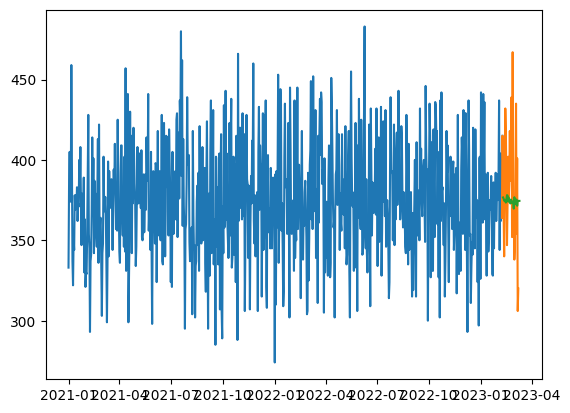

In [ ]:
plt.plot(train,label="gerçek veri")
plt.plot(test,label="test veri")
plt.plot(gelecek,label="tahmin veri")

In [ ]:
downsampled = train.resample('M').sum()
downsampled

/tmp/ipython-input-3488909742.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  downsampled = train.resample('M').sum()


,quantity
invoice_date,
2021-01-31,11483
2021-02-28,10179
2021-03-31,11383
2021-04-30,11270
2021-05-31,11620
2021-06-30,11352
2021-07-31,11986
2021-08-31,11205
2021-09-30,10901


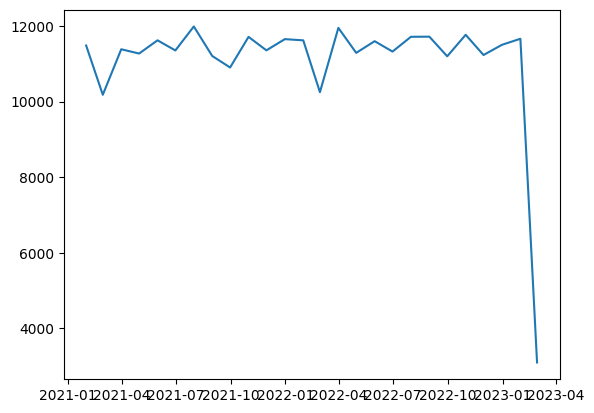

In [ ]:
plt.plot(downsampled)

In [ ]:
model2 = auto_arima(downsampled,trace=True,seasonal=True,m=3)
model2

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[3] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,0,0)(0,1,0)[3] intercept   : AIC=413.284, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[3] intercept   : AIC=416.438, Time=0.03 sec
 ARIMA(0,0,1)(0,1,1)[3] intercept   : AIC=416.725, Time=0.04 sec
 ARIMA(0,0,0)(0,1,0)[3]             : AIC=411.917, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[3] intercept   : AIC=414.749, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[3] intercept   : AIC=414.873, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[3] intercept   : AIC=416.310, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[3] intercept   : AIC=415.303, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[3] intercept   : AIC=415.507, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[3] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,0,0)(0,1,0)[3]          
Total fit time: 2.032 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 3),
      suppress_warnings=True, with_intercept=False)

In [ ]:
gelecek, guven_aralik = model2.predict(1, return_conf_int=True)
print(gelecek)

2023-03-31    11501.0
Freq: ME, dtype: float64
